In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
## directories
images = '../images'
saved_images = '../saved_images'
trans_images = '../trans_images'

In [3]:
img = cv2.imread(os.path.join(images, 'circle.png'), 0)

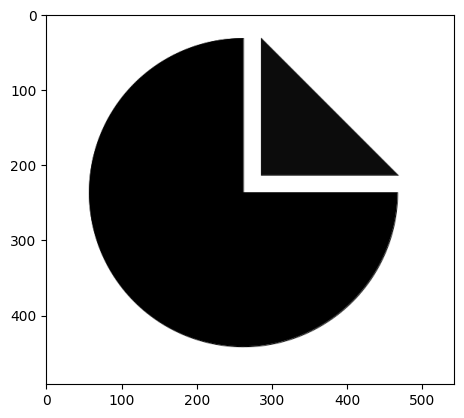

In [4]:
plt.imshow(img, cmap='gray')

## Harris corner detection
1. At flat regions: There is no significant intensity change in any direction.
2. At edges: There is a significant intensity change in one direction.
3. At corners: There is a significant intensity change in two directions.

In [5]:
cv2.cornerHarris??


Docstring:
cornerHarris(src, blockSize, ksize, k[, dst[, borderType]]) -> dst
.   @brief Harris corner detector.
.   
.   The function runs the Harris corner detector on the image. Similarly to cornerMinEigenVal and
.   cornerEigenValsAndVecs , for each pixel \f$(x, y)\f$ it calculates a \f$2\times2\f$ gradient covariance
.   matrix \f$M^{(x,y)}\f$ over a \f$\texttt{blockSize} \times \texttt{blockSize}\f$ neighborhood. Then, it
.   computes the following characteristic:
.   
.   \f[\texttt{dst} (x,y) =  \mathrm{det} M^{(x,y)} - k  \cdot \left ( \mathrm{tr} M^{(x,y)} \right )^2\f]
.   
.   Corners in the image can be found as the local maxima of this response map.
.   
.   @param src Input single-channel 8-bit or floating-point image.
.   @param dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same
.   size as src .
.   @param blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs ).
.   @param ksize Aperture parameter for the Sobel ope

In [6]:
corners = cv2.cornerHarris(img, blockSize=3, ksize=3, k=0.04)

In [7]:
corners

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
corners.shape

(492, 543)

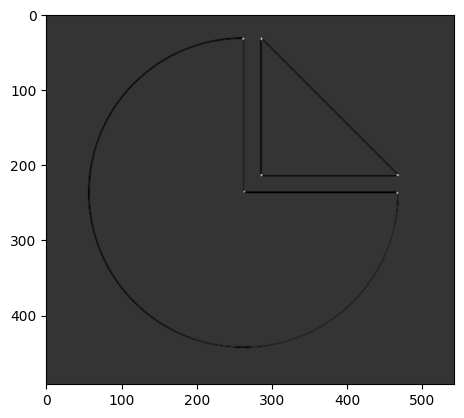

In [9]:
plt.imshow(corners, cmap='gray') # white marks are used to represent the corners discovered by the algorithm

In [11]:
## Non-maximum suppression (NMS) to remove false positives and keep only the strongest corners


0.018281147